In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown 1ho4fWmr1THutOF44gM2s50l_PMALM3Tk
!gdown 1NSVg9MfGkBcqOF9PMqx-LM3z8ogkVu2-
!gdown 1iCokZiJ9OoDys0J1l4G8UniVRR4iTMeK

Downloading...
From: https://drive.google.com/uc?id=1ho4fWmr1THutOF44gM2s50l_PMALM3Tk
To: /content/timeseries_proj - data1.csv
100% 8.40k/8.40k [00:00<00:00, 19.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NSVg9MfGkBcqOF9PMqx-LM3z8ogkVu2-
To: /content/timeseries_proj - targetvar.csv
100% 2.08k/2.08k [00:00<00:00, 6.39MB/s]
Downloading...
From: https://drive.google.com/uc?id=1iCokZiJ9OoDys0J1l4G8UniVRR4iTMeK
To: /content/timeseries_proj - media.csv
100% 1.82k/1.82k [00:00<00:00, 6.52MB/s]


In [3]:
df_media = pd.read_csv("timeseries_proj - media.csv")
df_media.head()

,TIMEDESC,Vehicle,CAMPAIGN,Spend
0,6/17/19,Digital,Ad1,152123.968800
1,6/24/19,Digital,Ad1,152123.206000
2,10/6/19,Digital,Ad1,152122.389900
3,1/7/19,Traditional,TV_ad1,7397.507571
4,1/8/19,Traditional,TV_ad1,5171.557764


In [4]:
df_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TIMEDESC  48 non-null     object 
 1   Vehicle   48 non-null     object 
 2   CAMPAIGN  48 non-null     object 
 3   Spend     48 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.6+ KB


In [5]:
df_media['TIMEDESC'] = pd.to_datetime(df_media['TIMEDESC'], format='%m/%d/%y')

In [6]:
df_media['Weeks'] = df_media['TIMEDESC'].dt.strftime('%Y%U')
# df_media = df_media[df_media['TIMEDESC'] <= pd.to_datetime('2019-10-31')]


In [7]:
df_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   TIMEDESC  48 non-null     datetime64[ns]
 1   Vehicle   48 non-null     object        
 2   CAMPAIGN  48 non-null     object        
 3   Spend     48 non-null     float64       
 4   Weeks     48 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.0+ KB


In [8]:
df_media.head(10)

,TIMEDESC,Vehicle,CAMPAIGN,Spend,Weeks
0,2019-06-17,Digital,Ad1,152123.968800,201924
1,2019-06-24,Digital,Ad1,152123.206000,201925
2,2019-10-06,Digital,Ad1,152122.389900,201940
3,2019-01-07,Traditional,TV_ad1,7397.507571,201901
4,2019-01-08,Traditional,TV_ad1,5171.557764,201901
5,2019-03-06,Traditional,TV_ad1,8645.511881,201909
6,2019-05-08,Traditional,TV_ad1,140312.618800,201918
7,2019-06-17,Traditional,TV_ad1,276792.813200,201924
8,2019-06-24,Traditional,TV_ad1,276793.010900,201925
9,2019-07-15,Traditional,TV_ad1,24319.705790,201928


In [9]:
df_pivot = df_media.drop('TIMEDESC', axis = 1)
df_pivot.head()

,Vehicle,CAMPAIGN,Spend,Weeks
0,Digital,Ad1,152123.968800,201924
1,Digital,Ad1,152123.206000,201925
2,Digital,Ad1,152122.389900,201940
3,Traditional,TV_ad1,7397.507571,201901
4,Traditional,TV_ad1,5171.557764,201901


In [10]:
df_pivot = pd.pivot_table(
    df_pivot,
    values= 'Spend',
    index= 'Weeks',
    columns= ['Vehicle', 'CAMPAIGN'],
    aggfunc='sum',
    margins= True,
    margins_name = 'Total'

)
df_pivot = df_pivot.fillna(0)
df_pivot = df_pivot.sort_index()
df_pivot.head()

Vehicle  Digital                              Sponsorship Traditional  \
CAMPAIGN     Ad1          Ad2      Others Experimental_ad      Others   
Weeks                                                                   
201850       0.0      0.00000    0.000000     83333.94331         0.0   
201851       0.0      0.00000    0.000000     83335.16602         0.0   
201852       0.0      0.00000    0.000000     11905.64780         0.0   
201900       0.0      0.00000  337.918567         0.00000         0.0   
201901       0.0  21088.99356    0.000000         0.00000         0.0   

Vehicle                                       Total  
CAMPAIGN        TV_ad1        TV_ad2                 
Weeks                                                
201850        0.000000       0.00000   83333.943310  
201851        0.000000       0.00000   83335.166020  
201852        0.000000       0.00000   11905.647800  
201900        0.000000       0.00000     337.918567  
201901    12569.065335  165700.89407  199358.952965

In [11]:
df_pivot.shape

(27, 8)

In [12]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 201850 to Total
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   (Digital, Ad1)                  27 non-null     float64
 1   (Digital, Ad2)                  27 non-null     float64
 2   (Digital, Others)               27 non-null     float64
 3   (Sponsorship, Experimental_ad)  27 non-null     float64
 4   (Traditional, Others)           27 non-null     float64
 5   (Traditional, TV_ad1)           27 non-null     float64
 6   (Traditional, TV_ad2)           27 non-null     float64
 7   (Total, )                       27 non-null     float64
dtypes: float64(8)
memory usage: 1.9+ KB


In [13]:
df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]

In [14]:
df_pivot = df_pivot.reset_index()

In [15]:
df_pivot.head()

,Weeks,Digital_Ad1,Digital_Ad2,Digital_Others,Sponsorship_Experimental_ad,Traditional_Others,Traditional_TV_ad1,Traditional_TV_ad2,Total_
0,201850,0.0,0.00000,0.000000,83333.94331,0.0,0.000000,0.00000,83333.943310
1,201851,0.0,0.00000,0.000000,83335.16602,0.0,0.000000,0.00000,83335.166020
2,201852,0.0,0.00000,0.000000,11905.64780,0.0,0.000000,0.00000,11905.647800
3,201900,0.0,0.00000,337.918567,0.00000,0.0,0.000000,0.00000,337.918567
4,201901,0.0,21088.99356,0.000000,0.00000,0.0,12569.065335,165700.89407,199358.952965


In [16]:
# def adstock(series, decay):
#   result = []
#   accumulated = 0
#   for value in series:
#     accumulated = value + accumulated * decay
#     result.append(accumulated)
#   return result

# def apply_adstock(df, columns_adstocked, decay):
#   for col in columns_adstocked:
#     df_pivot[f'adstock_{col}'] = adstock(df_pivot[col], decay)
#   return df

# columns_adstocked = ['Digital_Ad1', 'Digital_Ad2', 'Digital_Others', 'Sponsorship_Experimental_ad', 'Traditional_Others', 'Traditional_TV_ad1', 'Traditional_TV_ad2']
# decay = 0.2
# df_pivot = apply_adstock(df_pivot, columns_adstocked, decay)

In [17]:
def adstock(series, decay):
    result = []
    accumulated = 0
    for value in series:
        accumulated = value + accumulated * decay
        result.append(accumulated)
    return result

def apply_adstock(df, digital_columns, traditional_columns, digital_decay, traditional_decay):
    for col in digital_columns:
        df[f'adstock_{col}'] = adstock(df[col], digital_decay)
    for col in traditional_columns:
        df[f'adstock_{col}'] = adstock(df[col], traditional_decay)
    return df

digital_columns = ['Digital_Ad1', 'Digital_Ad2', 'Digital_Others']
traditional_columns = ['Sponsorship_Experimental_ad', 'Traditional_Others', 'Traditional_TV_ad1', 'Traditional_TV_ad2']

digital_decay = 0.2
traditional_decay = 0.5

df_pivot = apply_adstock(df_pivot, digital_columns, traditional_columns, digital_decay, traditional_decay)

In [18]:
df_pivot.drop(['Digital_Ad1', 'Digital_Ad2', 'Digital_Others', 'Sponsorship_Experimental_ad', 'Traditional_Others', 'Traditional_TV_ad1', 'Traditional_TV_ad2'],
axis=1, inplace=True)

df_pivot.head(10)

,Weeks,Total_,adstock_Digital_Ad1,adstock_Digital_Ad2,adstock_Digital_Others,adstock_Sponsorship_Experimental_ad,adstock_Traditional_Others,adstock_Traditional_TV_ad1,adstock_Traditional_TV_ad2
0,201850,83333.943310,0.0,0.000000,0.000000,83333.943310,0.0,0.000000,0.000000
1,201851,83335.166020,0.0,0.000000,0.000000,125002.137675,0.0,0.000000,0.000000
2,201852,11905.647800,0.0,0.000000,0.000000,74406.716638,0.0,0.000000,0.000000
3,201900,337.918567,0.0,0.000000,337.918567,37203.358319,0.0,0.000000,0.000000
4,201901,199358.952965,0.0,21088.993560,67.583713,18601.679159,0.0,12569.065335,165700.894070
5,201902,2422.315809,0.0,4217.798712,2435.832552,9300.839580,0.0,6284.532667,82850.447035
6,201903,2422.742326,0.0,843.559742,2909.908836,4650.419790,0.0,3142.266334,41425.223518
7,201904,1385.148311,0.0,168.711948,1967.130078,2325.209895,0.0,1571.133167,20712.611759
8,201906,9022.252974,0.0,9055.995364,393.426016,1162.604947,0.0,785.566583,10356.305879
9,201909,8645.511881,0.0,1811.199073,78.685203,581.302474,0.0,9038.295173,5178.152940


In [19]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Weeks                                27 non-null     object 
 1   Total_                               27 non-null     float64
 2   adstock_Digital_Ad1                  27 non-null     float64
 3   adstock_Digital_Ad2                  27 non-null     float64
 4   adstock_Digital_Others               27 non-null     float64
 5   adstock_Sponsorship_Experimental_ad  27 non-null     float64
 6   adstock_Traditional_Others           27 non-null     float64
 7   adstock_Traditional_TV_ad1           27 non-null     float64
 8   adstock_Traditional_TV_ad2           27 non-null     float64
dtypes: float64(8), object(1)
memory usage: 2.0+ KB


In [20]:
df_sales = pd.read_csv("timeseries_proj - data1.csv")
df_sales.head()

,Weeks,l7d_Base,l7d,p4w_Base,p4w_Base.1,p4w,p3m_Base,p3m_Base.1,p3m,MeetNeeds_Base,MeetNeeds,TotalAwareness_Base,TotalAwareness,FirstMention_Base,FirstMention,Affinity_Base,Affinity
0,201801,77,1.38%,74,77,9.64%,74,78,27.58%,70,25.20%,76,93.25%,77,-,72,26.65%
1,201802,59,1.73%,58,61,6.70%,58,62,13.23%,53,17.09%,63,90.04%,60,-,57,14.80%
2,201803,44,-,39,41,7.65%,39,44,27.32%,41,12.58%,44,97.65%,41,-,41,23.20%
3,201804,55,-,50,55,3.87%,50,53,11.63%,50,6.24%,51,92.59%,54,-,50,8.63%
4,201805,50,2.15%,45,48,4.30%,45,47,19.69%,38,10.65%,50,82.47%,48,-,39,15.78%


In [21]:
df_sales['Weeks'] = df_sales['Weeks'].astype(str)

In [22]:
df_merge = pd.merge(df_pivot, df_sales, on='Weeks', how='right')

In [23]:
df_merge.head()

,Weeks,Total_,adstock_Digital_Ad1,adstock_Digital_Ad2,adstock_Digital_Others,adstock_Sponsorship_Experimental_ad,adstock_Traditional_Others,adstock_Traditional_TV_ad1,adstock_Traditional_TV_ad2,l7d_Base,...,p3m_Base.1,p3m,MeetNeeds_Base,MeetNeeds,TotalAwareness_Base,TotalAwareness,FirstMention_Base,FirstMention,Affinity_Base,Affinity
0,201801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77,...,78,27.58%,70,25.20%,76,93.25%,77,-,72,26.65%
1,201802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,...,62,13.23%,53,17.09%,63,90.04%,60,-,57,14.80%
2,201803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,...,44,27.32%,41,12.58%,44,97.65%,41,-,41,23.20%
3,201804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,...,53,11.63%,50,6.24%,51,92.59%,54,-,50,8.63%
4,201805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,...,47,19.69%,38,10.65%,50,82.47%,48,-,39,15.78%


In [24]:
df_merge.shape

(102, 25)

In [23]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Weeks                                24 non-null     object 
 1   Total_                               24 non-null     float64
 2   adstock_Digital_Ad1                  24 non-null     float64
 3   adstock_Digital_Ad2                  24 non-null     float64
 4   adstock_Digital_Others               24 non-null     float64
 5   adstock_Sponsorship_Experimental_ad  24 non-null     float64
 6   adstock_Traditional_Others           24 non-null     float64
 7   adstock_Traditional_TV_ad1           24 non-null     float64
 8   adstock_Traditional_TV_ad2           24 non-null     float64
 9   l7d_Base                             24 non-null     int64  
 10  l7d                                  24 non-null     object 
 11  p4w_Base                          

In [24]:
df_target = pd.read_csv("timeseries_proj - targetvar.csv")
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TIMEDESC  99 non-null     int64  
 1   target1   99 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [25]:
df_target.rename(columns={'TIMEDESC': 'Weeks'}, inplace= True)
df_target['Weeks'] = df_target['Weeks'].astype(str)
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weeks    99 non-null     object 
 1   target1  99 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [26]:
df = pd.merge(df_merge, df_target, on='Weeks')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Weeks                                21 non-null     object 
 1   Total_                               21 non-null     float64
 2   adstock_Digital_Ad1                  21 non-null     float64
 3   adstock_Digital_Ad2                  21 non-null     float64
 4   adstock_Digital_Others               21 non-null     float64
 5   adstock_Sponsorship_Experimental_ad  21 non-null     float64
 6   adstock_Traditional_Others           21 non-null     float64
 7   adstock_Traditional_TV_ad1           21 non-null     float64
 8   adstock_Traditional_TV_ad2           21 non-null     float64
 9   l7d_Base                             21 non-null     int64  
 10  l7d                                  21 non-null     object 
 11  p4w_Base                          

In [28]:
df.head(20)

,Weeks,Total_,adstock_Digital_Ad1,adstock_Digital_Ad2,adstock_Digital_Others,adstock_Sponsorship_Experimental_ad,adstock_Traditional_Others,adstock_Traditional_TV_ad1,adstock_Traditional_TV_ad2,l7d_Base,...,p3m,MeetNeeds_Base,MeetNeeds,TotalAwareness_Base,TotalAwareness,FirstMention_Base,FirstMention,Affinity_Base,Affinity,target1
0,201850,83333.943310,0.000000,0.000000,0.000000,83333.943310,0.000000,0.000000,0.000000,83,...,18.26%,77,15.79%,85,92.60%,85,-,80,22.41%,0.132857
1,201851,83335.166020,0.000000,0.000000,0.000000,125002.137675,0.000000,0.000000,0.000000,43,...,17.47%,40,11.45%,41,87.57%,42,-,38,8.61%,0.126077
2,201901,199358.952965,0.000000,21088.993560,67.583713,18601.679159,0.000000,12569.065335,165700.894070,75,...,18.58%,67,11.53%,76,88.42%,76,1.41%,63,11.07%,0.118401
3,201902,2422.315809,0.000000,4217.798712,2435.832552,9300.839580,0.000000,6284.532667,82850.447035,132,...,15.35%,124,15.64%,133,93.30%,133,0.78%,124,13.15%,0.098307
4,201903,2422.742326,0.000000,843.559742,2909.908836,4650.419790,0.000000,3142.266334,41425.223518,127,...,17.03%,110,7.57%,126,85.38%,126,-,108,14.04%,0.095422
5,201904,1385.148311,0.000000,168.711948,1967.130078,2325.209895,0.000000,1571.133167,20712.611759,92,...,16.06%,84,11.89%,95,90.82%,92,-,88,13.38%,0.086361
6,201906,9022.252974,0.000000,9055.995364,393.426016,1162.604947,0.000000,785.566583,10356.305879,117,...,12.42%,100,15.01%,113,88.50%,113,-,102,13.01%,0.119062
7,201909,8645.511881,0.000000,1811.199073,78.685203,581.302474,0.000000,9038.295173,5178.152940,107,...,19.00%,95,12.95%,108,87.56%,109,-,97,14.05%,0.108170
8,201918,326586.121180,0.000000,78259.019395,15.737041,290.651237,108376.722800,144831.766386,2589.076470,114,...,18.00%,88,18.90%,113,76.58%,115,-,89,17.67%,0.130416
9,201924,452317.032880,152123.968800,15651.803879,23403.398288,145.325618,54188.361400,349208.696393,1294.538235,83,...,20.52%,79,13.36%,82,96.17%,82,1.27%,77,17.34%,0.122901


In [29]:
df['FirstMention'].value_counts()

FirstMention
-        13
1.41%     1
0.78%     1
1.27%     1
0.89%     1
1.71%     1
1.22%     1
1.77%     1
1.84%     1
Name: count, dtype: int64

In [30]:
df = df.replace('-', np.nan)
df.head()

,Weeks,Total_,adstock_Digital_Ad1,adstock_Digital_Ad2,adstock_Digital_Others,adstock_Sponsorship_Experimental_ad,adstock_Traditional_Others,adstock_Traditional_TV_ad1,adstock_Traditional_TV_ad2,l7d_Base,...,p3m,MeetNeeds_Base,MeetNeeds,TotalAwareness_Base,TotalAwareness,FirstMention_Base,FirstMention,Affinity_Base,Affinity,target1
0,201850,83333.943310,0.0,0.000000,0.000000,83333.943310,0.0,0.000000,0.000000,83,...,18.26%,77,15.79%,85,92.60%,85,NaN,80,22.41%,0.132857
1,201851,83335.166020,0.0,0.000000,0.000000,125002.137675,0.0,0.000000,0.000000,43,...,17.47%,40,11.45%,41,87.57%,42,NaN,38,8.61%,0.126077
2,201901,199358.952965,0.0,21088.993560,67.583713,18601.679159,0.0,12569.065335,165700.894070,75,...,18.58%,67,11.53%,76,88.42%,76,1.41%,63,11.07%,0.118401
3,201902,2422.315809,0.0,4217.798712,2435.832552,9300.839580,0.0,6284.532667,82850.447035,132,...,15.35%,124,15.64%,133,93.30%,133,0.78%,124,13.15%,0.098307
4,201903,2422.742326,0.0,843.559742,2909.908836,4650.419790,0.0,3142.266334,41425.223518,127,...,17.03%,110,7.57%,126,85.38%,126,NaN,108,14.04%,0.095422


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Weeks                                21 non-null     object 
 1   Total_                               21 non-null     float64
 2   adstock_Digital_Ad1                  21 non-null     float64
 3   adstock_Digital_Ad2                  21 non-null     float64
 4   adstock_Digital_Others               21 non-null     float64
 5   adstock_Sponsorship_Experimental_ad  21 non-null     float64
 6   adstock_Traditional_Others           21 non-null     float64
 7   adstock_Traditional_TV_ad1           21 non-null     float64
 8   adstock_Traditional_TV_ad2           21 non-null     float64
 9   l7d_Base                             21 non-null     int64  
 10  l7d                                  18 non-null     object 
 11  p4w_Base                          

In [32]:
df.drop(['p4w_Base', 'p3m_Base'], axis=1, inplace = True)

In [33]:
df['l7d'].head()

0    1.22%
1      NaN
2      NaN
3    1.64%
4      NaN
Name: l7d, dtype: object

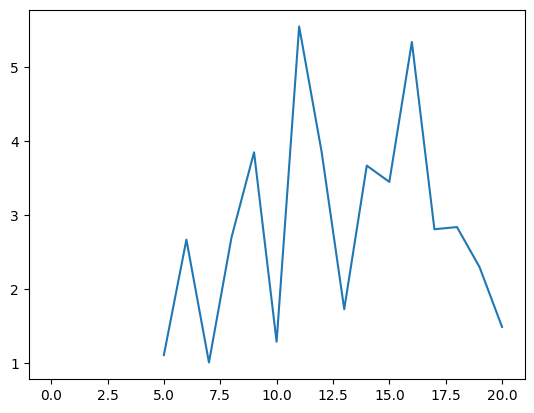

In [34]:
df['l7d'] = df['l7d'].str.replace('%', '')
df['l7d'] = pd.to_numeric(df['l7d'], errors='coerce')

plt.plot(df['l7d'])
plt.show()

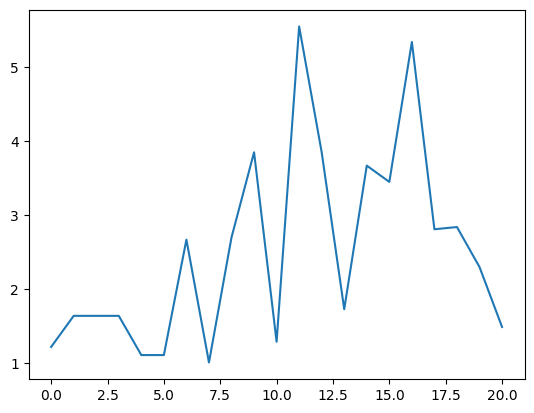

In [35]:
df['l7d'].fillna(method='bfill', inplace=True)

plt.plot(df['l7d'])
plt.show()

In [36]:
df = df.applymap(lambda x:x.replace('%', '') if isinstance(x, str) else x)
df.head()

,Weeks,Total_,adstock_Digital_Ad1,adstock_Digital_Ad2,adstock_Digital_Others,adstock_Sponsorship_Experimental_ad,adstock_Traditional_Others,adstock_Traditional_TV_ad1,adstock_Traditional_TV_ad2,l7d_Base,...,p3m,MeetNeeds_Base,MeetNeeds,TotalAwareness_Base,TotalAwareness,FirstMention_Base,FirstMention,Affinity_Base,Affinity,target1
0,201850,83333.943310,0.0,0.000000,0.000000,83333.943310,0.0,0.000000,0.000000,83,...,18.26,77,15.79,85,92.60,85,NaN,80,22.41,0.132857
1,201851,83335.166020,0.0,0.000000,0.000000,125002.137675,0.0,0.000000,0.000000,43,...,17.47,40,11.45,41,87.57,42,NaN,38,8.61,0.126077
2,201901,199358.952965,0.0,21088.993560,67.583713,18601.679159,0.0,12569.065335,165700.894070,75,...,18.58,67,11.53,76,88.42,76,1.41,63,11.07,0.118401
3,201902,2422.315809,0.0,4217.798712,2435.832552,9300.839580,0.0,6284.532667,82850.447035,132,...,15.35,124,15.64,133,93.30,133,0.78,124,13.15,0.098307
4,201903,2422.742326,0.0,843.559742,2909.908836,4650.419790,0.0,3142.266334,41425.223518,127,...,17.03,110,7.57,126,85.38,126,NaN,108,14.04,0.095422


In [37]:
df = df.apply(pd.to_numeric, errors= 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Weeks                                21 non-null     int64  
 1   Total_                               21 non-null     float64
 2   adstock_Digital_Ad1                  21 non-null     float64
 3   adstock_Digital_Ad2                  21 non-null     float64
 4   adstock_Digital_Others               21 non-null     float64
 5   adstock_Sponsorship_Experimental_ad  21 non-null     float64
 6   adstock_Traditional_Others           21 non-null     float64
 7   adstock_Traditional_TV_ad1           21 non-null     float64
 8   adstock_Traditional_TV_ad2           21 non-null     float64
 9   l7d_Base                             21 non-null     int64  
 10  l7d                                  21 non-null     float64
 11  p4w_Base.1                        

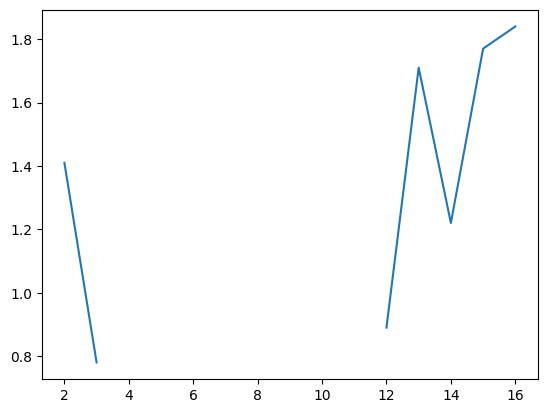

In [38]:
plt.plot(df['FirstMention'])
plt.show()

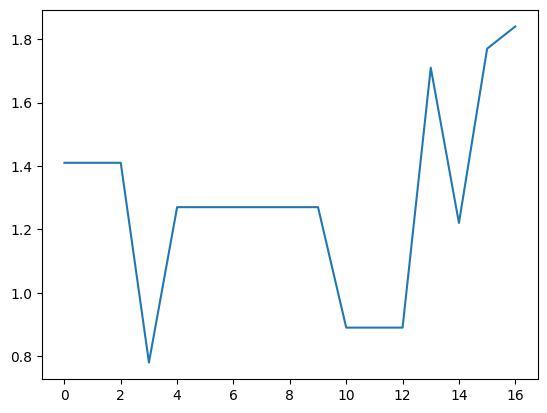

In [39]:
df['FirstMention'].fillna(method='bfill', inplace=True)

plt.plot(df['FirstMention'])
plt.show()

In [40]:
# mean_FirstMention = df['FirstMention'].mean()
df['FirstMention'].fillna('0', inplace = True)
df['FirstMention'] = pd.to_numeric(df['FirstMention'], errors='coerce')
df['FirstMention'].isna().sum()

0

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Weeks                                21 non-null     int64  
 1   Total_                               21 non-null     float64
 2   adstock_Digital_Ad1                  21 non-null     float64
 3   adstock_Digital_Ad2                  21 non-null     float64
 4   adstock_Digital_Others               21 non-null     float64
 5   adstock_Sponsorship_Experimental_ad  21 non-null     float64
 6   adstock_Traditional_Others           21 non-null     float64
 7   adstock_Traditional_TV_ad1           21 non-null     float64
 8   adstock_Traditional_TV_ad2           21 non-null     float64
 9   l7d_Base                             21 non-null     int64  
 10  l7d                                  21 non-null     float64
 11  p4w_Base.1                        

In [42]:
df = df.rename(columns={'p4w_Base.1':'p4w_Base','p3m_Base.1':'p3m_Base'})

In [43]:
def apply_percentage(df, percentage_columns):

  for col in percentage_columns:
    value = f'{col}_Base'
    df[col] = (df[value] * df[col])/ 100
  return df

percentage_columns = ['l7d', 'p4w', 'p3m', 'MeetNeeds', 'TotalAwareness', 'FirstMention', 'Affinity']
df = apply_percentage(df, percentage_columns)

df.head(20)

,Weeks,Total_,adstock_Digital_Ad1,adstock_Digital_Ad2,adstock_Digital_Others,adstock_Sponsorship_Experimental_ad,adstock_Traditional_Others,adstock_Traditional_TV_ad1,adstock_Traditional_TV_ad2,l7d_Base,...,p3m,MeetNeeds_Base,MeetNeeds,TotalAwareness_Base,TotalAwareness,FirstMention_Base,FirstMention,Affinity_Base,Affinity,target1
0,201850,83333.943310,0.000000,0.000000,0.000000,83333.943310,0.000000,0.000000,0.000000,83,...,15.1558,77,12.1583,85,78.7100,85,1.1985,80,17.9280,0.132857
1,201851,83335.166020,0.000000,0.000000,0.000000,125002.137675,0.000000,0.000000,0.000000,43,...,7.1627,40,4.5800,41,35.9037,42,0.5922,38,3.2718,0.126077
2,201901,199358.952965,0.000000,21088.993560,67.583713,18601.679159,0.000000,12569.065335,165700.894070,75,...,13.3776,67,7.7251,76,67.1992,76,1.0716,63,6.9741,0.118401
3,201902,2422.315809,0.000000,4217.798712,2435.832552,9300.839580,0.000000,6284.532667,82850.447035,132,...,20.2620,124,19.3936,133,124.0890,133,1.0374,124,16.3060,0.098307
4,201903,2422.742326,0.000000,843.559742,2909.908836,4650.419790,0.000000,3142.266334,41425.223518,127,...,21.2875,110,8.3270,126,107.5788,126,1.6002,108,15.1632,0.095422
5,201904,1385.148311,0.000000,168.711948,1967.130078,2325.209895,0.000000,1571.133167,20712.611759,92,...,15.0964,84,9.9876,95,86.2790,92,1.1684,88,11.7744,0.086361
6,201906,9022.252974,0.000000,9055.995364,393.426016,1162.604947,0.000000,785.566583,10356.305879,117,...,14.2830,100,15.0100,113,100.0050,113,1.4351,102,13.2702,0.119062
7,201909,8645.511881,0.000000,1811.199073,78.685203,581.302474,0.000000,9038.295173,5178.152940,107,...,20.1400,95,12.3025,108,94.5648,109,1.3843,97,13.6285,0.108170
8,201918,326586.121180,0.000000,78259.019395,15.737041,290.651237,108376.722800,144831.766386,2589.076470,114,...,20.8800,88,16.6320,113,86.5354,115,1.4605,89,15.7263,0.130416
9,201924,452317.032880,152123.968800,15651.803879,23403.398288,145.325618,54188.361400,349208.696393,1294.538235,83,...,16.2108,79,10.5544,82,78.8594,82,1.0414,77,13.3518,0.122901


In [ ]:
columns_drop = [col for col in df.columns if col.endswith('_Base')]
df = df.drop(columns=columns_drop)
df = df.drop(['Total_','Weeks'], axis=1)
df.head()

,adstock_Digital_Ad1,adstock_Digital_Ad2,adstock_Digital_Others,adstock_Sponsorship_Experimental_ad,adstock_Traditional_Others,adstock_Traditional_TV_ad1,adstock_Traditional_TV_ad2,l7d,p4w,p3m,MeetNeeds,TotalAwareness,FirstMention,Affinity,target1
0,0.0,0.000000,0.000000,83333.943310,0.0,0.000000,0.000000,1.0126,5.2896,15.1558,12.1583,78.7100,1.1985,17.9280,0.132857
1,0.0,0.000000,0.000000,125002.137675,0.0,0.000000,0.000000,0.7052,1.0374,7.1627,4.5800,35.9037,0.5922,3.2718,0.126077
2,0.0,21088.993560,67.583713,18601.679159,0.0,12569.065335,165700.894070,1.2300,8.4952,13.3776,7.7251,67.1992,1.0716,6.9741,0.118401
3,0.0,4217.798712,2435.832552,9300.839580,0.0,6284.532667,82850.447035,2.1648,10.1376,20.2620,19.3936,124.0890,1.0374,16.3060,0.098307
4,0.0,843.559742,2909.908836,4650.419790,0.0,3142.266334,41425.223518,1.4097,6.2952,21.2875,8.3270,107.5788,1.6002,15.1632,0.095422


                                     adstock_Digital_Ad1  adstock_Digital_Ad2  \
adstock_Digital_Ad1                             1.000000            -0.234202   
adstock_Digital_Ad2                            -0.234202             1.000000   
adstock_Digital_Others                          0.994016            -0.269205   
adstock_Sponsorship_Experimental_ad            -0.180613            -0.258008   
adstock_Traditional_Others                      0.263823             0.255055   
adstock_Traditional_TV_ad1                      0.926417            -0.016877   
adstock_Traditional_TV_ad2                     -0.323204             0.566053   
l7d                                            -0.004077             0.374087   
p4w                                            -0.226212             0.567629   
p3m                                            -0.170492             0.555468   
MeetNeeds                                      -0.176037             0.530391   
TotalAwareness              

<Axes: >

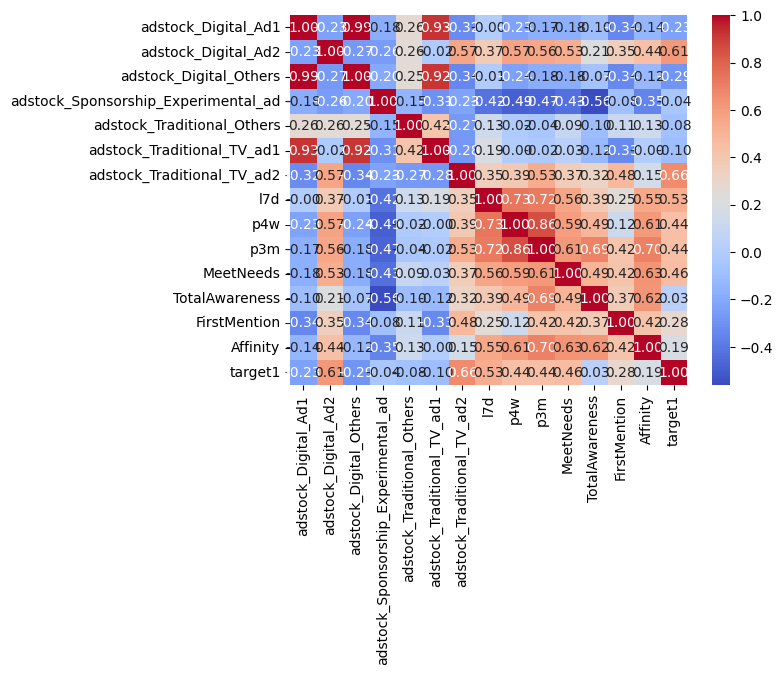

In [ ]:
import seaborn as sns
correlation_matrix = df.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns= df.columns)
df.head()

,adstock_Digital_Ad1,adstock_Digital_Ad2,adstock_Digital_Others,adstock_Sponsorship_Experimental_ad,adstock_Traditional_Others,adstock_Traditional_TV_ad1,adstock_Traditional_TV_ad2,l7d,p4w,p3m,MeetNeeds,TotalAwareness,FirstMention,Affinity,target1
0,0.0,0.000000,0.000000,0.666660,0.0,0.000000,0.000000,0.057684,0.211818,0.259472,0.389838,0.485413,0.576424,0.775292,0.503804
1,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.284821,0.000000,0.433446
2,0.0,0.168110,0.002407,0.148810,0.0,0.027845,0.714222,0.098480,0.371501,0.201748,0.161788,0.354883,0.515391,0.195846,0.353797
3,0.0,0.033622,0.086742,0.074405,0.0,0.013922,0.357111,0.273898,0.453315,0.425229,0.762032,1.000000,0.498942,0.689491,0.145295
4,0.0,0.006724,0.103624,0.037202,0.0,0.006961,0.178555,0.132201,0.261910,0.458519,0.192751,0.812778,0.769623,0.629038,0.115360


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_size = int(len(df)*0.8)
train, test = df[:train_size], df[train_size:]

# def mean_absolute_percentage_error(y_true, y_pred):
#   y_true, y_pred = np.array(y_true), np.array(y_pred)
#   return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

# def r_squared(y_true, y_pred):
#   ss_res = np.sum((y_true - y_pred) ** 2)
#   ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
#   return 1-(ss_res/ss_tot)

def adj_r(r_squared, n, k):
  return 1- ((1- r_squared)*(n-1)/(n-k-1))

features = df.columns.difference(['target1'])
X_train, y_train = train[features], train['target1']
X_test, y_test = test[features], test['target1']

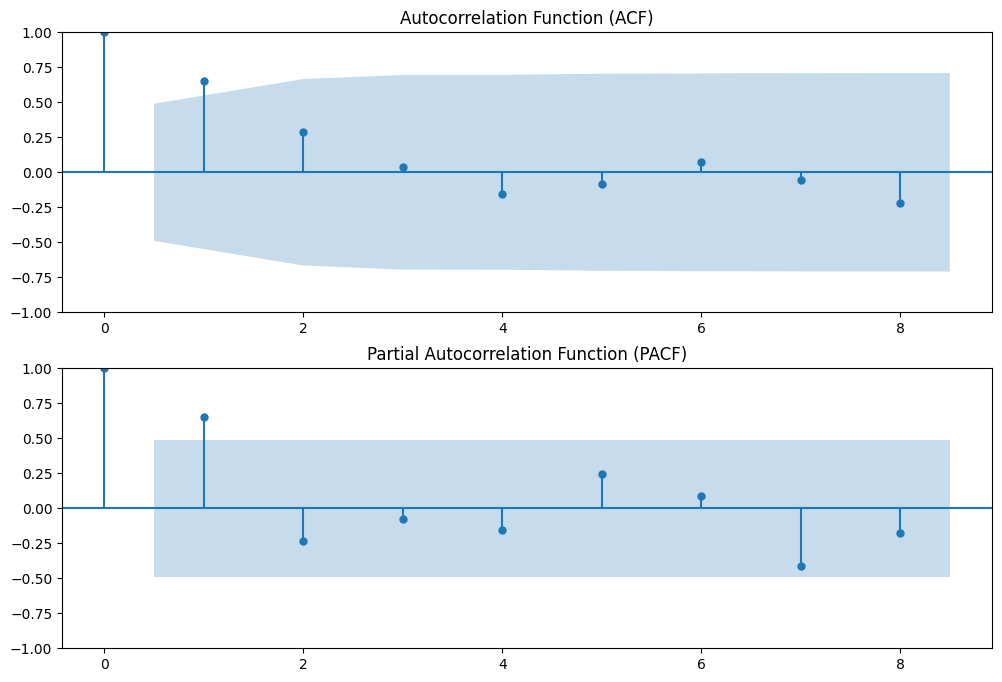

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

max_lags = len(y_train)//2

fig, ax = plt.subplots(2, 1, figsize=(12,8))

plot_acf(y_train, ax=ax[0], lags=max_lags)
ax[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(y_train, ax = ax[1], lags=max_lags)
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(y_train)
# print('ADF Statistic: ', results[0])
print('p-value: ', results[1])
# for key, value in results[4].items():
#   print('Critical values:')
#   print(f'{key}, {value}')

p-value:  0.819061477826266


In [ ]:
# !pip install pmdarima

In [ ]:
# import pmdarima as pm

# d = pm.arima.ndiffs(y_train)
# print(d)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

exog_train = train[features]
exog_test = test[features]

model_sarimax = SARIMAX(y_train, exog = exog_train, order=(2,0,2))
model_fit_sarimax = model_sarimax.fit()

forecast_sarimax = model_fit_sarimax.forecast(steps = len(test), exog = exog_test)

mape = mean_absolute_percentage_error(y_test, forecast_sarimax)
print(f'MAPE_SARIMAX: {mape}')

r_square = r2_score(y_test, forecast_sarimax)
print(f'r_squared: {r_square}')

adj_r_square = adj_r(r_square, n = len(test), k = len(features))

print(f'Adj R Squared: {adj_r_square}')

params_sarimax = model_fit_sarimax.params
print('SARIMAX coefficients:')
print(params_sarimax)

MAPE_SARIMAX: 0.8523363024502725
r_squared: -7.2221969727142525
Adj R Squared: 4.288878789085701
SARIMAX coefficients:
Affinity                               0.344199
FirstMention                           0.390629
MeetNeeds                              0.440794
TotalAwareness                        -1.021565
adstock_Digital_Ad1                    2.098880
adstock_Digital_Ad2                    0.125330
adstock_Digital_Others                -1.000022
adstock_Sponsorship_Experimental_ad    0.277434
adstock_Traditional_Others             0.137711
adstock_Traditional_TV_ad1            -1.407193
adstock_Traditional_TV_ad2             0.320453
l7d                                    0.813063
p3m                                    0.522490
p4w                                   -0.092954
ar.L1                                 -0.742068
ar.L2                                 -0.752542
ma.L1                                 -0.492338
ma.L2                                  0.287147
sigma2           

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


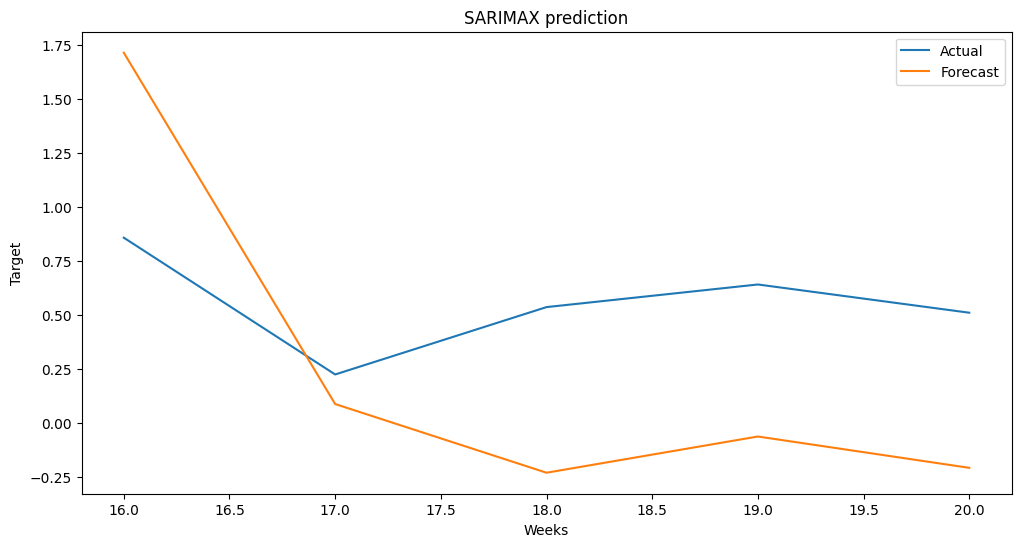

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label = 'Actual')
plt.plot(y_test.index, forecast_sarimax, label = 'Forecast')
plt.xlabel('Weeks')
plt.ylabel('Target')
plt.title('SARIMAX prediction')
plt.legend()
plt.show()

In [ ]:
;

''

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


# Create lagged versions of the target variable
lags = 2
for lag in range(1, lags + 1):
    df[f'target1_lag_{lag}'] = df['target1'].shift(lag)

df.dropna(inplace=True)

additional_features = ['adstock_Digital_Ad1', 'adstock_Digital_Ad2', 'adstock_Digital_Others', 'adstock_Sponsorship_Experimental_ad',
                       'adstock_Traditional_Others', 'adstock_Traditional_TV_ad1', 'adstock_Traditional_TV_ad2',
                       'l7d', 'p4w', 'p3m',
                       'MeetNeeds', 'TotalAwareness',
                       'FirstMention', 'Affinity']
lagged_features = [f'target1_lag_{lag}' for lag in range(1, lags + 1)]
features = additional_features + lagged_features

X = df[features]
y = df['target1']


KeyError: "['adstock_Digital_Others'] not in index"

In [ ]:
df.info()

In [ ]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df['Weeks'][train_size:], y_test, label='Actual')
plt.plot(df['Weeks'][train_size:], y_pred, label='Predicted')
plt.xlabel('Weeks')
plt.ylabel('target1')
plt.title('Actual vs. Predicted values')
plt.legend()
plt.show()


In [ ]:
# Get the coefficients of the model
coefficients = model.coef_

# Get the feature names
feature_names = X_train.columns

# Combine the feature names and coefficients into a DataFrame for better readability
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Display the coefficients
print(coeff_df)


In [ ]:
# !pip install pystan==2.19.1.1
# !pip install prophet

In [ ]:
import datetime

def convert_yyyyww_to_datetime(yyyyww):
    year = int(str(yyyyww)[:4])
    week = int(str(yyyyww)[4:])
    return pd.to_datetime(f'{year}-W{week-1}-1', format='%Y-W%W-%w')

df['Weeks'] = df['Weeks'].apply(convert_yyyyww_to_datetime)

print(df.head())


In [ ]:
df_prophet = df.rename(columns={'Weeks': 'ds', 'target1': 'y'})

# Ensure other columns are used as regressors
regressors = df_prophet.columns.difference(['ds', 'y']).tolist()

# Print to verify
print(df_prophet.head())


In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt

# # Initialize Prophet model
# model = Prophet()

# # Add regressors to the model
# for regressor in regressors:
#     model.add_regressor(regressor)

# # Fit the model
# model.fit(df_prophet)

# # Create future dataframe
# future = model.make_future_dataframe(periods=5, freq='W')  # Ensure frequency is set to weeks

# # Include regressors in the future DataFrame
# # Assuming the mean value for future regressors (or use more sophisticated approach)
# for regressor in regressors:
#     future[regressor] = df_prophet[regressor].mean()

# # Make predictions
# forecast = model.predict(future)

# # Plot the forecast
# fig = model.plot(forecast)
# plt.xlabel('Weeks')
# plt.ylabel('Target Variable')
# plt.title('Prophet Forecast with Regressors')
# plt.show()

# # Plot components
# fig2 = model.plot_components(forecast)
# plt.show()


In [ ]:
# Assuming df_prophet is your prepared DataFrame with Prophet-compatible format
# Sort by the 'ds' column to ensure data is in chronological order
df_prophet_sorted = df_prophet.sort_values('ds')

# Slice the dataset to keep only the last 4-5 weeks
last_weeks_data = df_prophet_sorted.tail(5)  # Adjust the number of weeks as needed


In [ ]:
# Slice the dataset to exclude the last 4-5 weeks
historical_data = df_prophet_sorted.iloc[:-5]

# Initialize Prophet model
model = Prophet()

# Add regressors to the model
for regressor in regressors:
    model.add_regressor(regressor)

# Fit the model on historical data
model.fit(historical_data)


In [ ]:
# Create future dataframe for the last 4-5 weeks
future_last_weeks = model.make_future_dataframe(periods=5, freq='W')  # Adjust the number of weeks as needed
future_last_weeks = future_last_weeks.tail(5)  # Select only the last 5 weeks

# Include regressors in the future DataFrame
# Assuming the mean value for future regressors (or use more sophisticated approach)
for regressor in regressors:
    future_last_weeks[regressor] = df_prophet[regressor].mean()

# Make predictions for the last 4-5 weeks
forecast_last_weeks = model.predict(future_last_weeks)

# Extract actual values for the last 4-5 weeks
actual_last_weeks = df_prophet_sorted.tail(5)

# Plot the comparison
plt.plot(actual_last_weeks['ds'], actual_last_weeks['y'], label='Actual')
plt.plot(actual_last_weeks['ds'], forecast_last_weeks['yhat'], label='Forecast')
plt.xlabel('Weeks')
plt.ylabel('Target Variable')
plt.title('Actual vs Forecast for Last 4-5 Weeks')
plt.legend()
plt.show()
